In [ ]:
from google.colab import files
uploaded = files.upload()

Saving used_cars.csv to used_cars (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("used_cars.csv")
df.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
import pandas as pd

df['price'] = df['price'].str.replace('$','').str.replace(',','').astype(float)

y = pd.qcut(df['price'], 3, labels=['Económico','Medio','Premium'])
y.value_counts()

,count
price,
Económico,1339
Medio,1335
Premium,1335


In [ ]:
# --- LIMPIEZA DE MILAGE ---
df['milage'] = df['milage'].astype(str)  # Forzar a string
df['milage'] = df['milage'].str.replace(' mi.','', regex=False).str.replace(',','', regex=False)
df['milage'] = pd.to_numeric(df['milage'], errors='coerce')  # Convertir a número

# --- LIMPIEZA DE PRICE ---
df['price'] = df['price'].astype(str)  # Forzar a string
df['price'] = df['price'].str.replace('$','', regex=False).str.replace(',','', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convertir a número

# Revisar resultados
df[['milage','price']].head()

,milage,price
0,51000,10300.0
1,34742,38005.0
2,22372,54598.0
3,88900,15500.0
4,9835,34999.0


In [ ]:
print(df.isnull().sum())

for col in df.columns:
    if df[col].dtype == 'float64':
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64


/tmp/ipython-input-500364268.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-500364268.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['brand','model','fuel_type','transmission','ext_col','int_col']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['milage','model_year','price']] = scaler.fit_transform(df[['milage','model_year','price']])

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
df = remove_outliers(df, "price")
df = remove_outliers(df, "milage")

In [ ]:
Q1, Q3 = df['price'].quantile([0.25,0.75])
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = pd.qcut(df['price'], 3, labels=['Económico','Medio','Premium'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
!pip install kagglehub pandas matplotlib seaborn scikit-learn --quiet


In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
path = kagglehub.dataset_download("taeefnajib/used-car-price-prediction-dataset")
print("Ruta del dataset:", path)

100%|██████████| 109k/109k [00:00<00:00, 34.9MB/s]

Extracting files...
Ruta del dataset: /root/.cache/kagglehub/datasets/taeefnajib/used-car-price-prediction-dataset/versions/1


In [ ]:
df = pd.read_csv(f"{path}/used_cars.csv")
df.columns = ['brand', 'model', 'model_year', 'milage', 'fuel_type',
              'engine', 'transmission', 'ext_col', 'int_col',
              'accident', 'clean_title', 'price']


In [ ]:
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
df['milage'] = df['milage'].replace(r'[,.a-zA-Z\s\.]', '', regex=True).astype(float)
df['model_year'] = df['model_year'].astype(int)

df = df.dropna(subset=['brand', 'model_year', 'milage', 'fuel_type', 'price'])

In [ ]:
p33 = df['price'].quantile(0.33)
p66 = df['price'].quantile(0.66)

def clasificar_precio(valor):
    if valor <= p33:
        return 'Económico'
    elif valor <= p66:
        return 'Medio'
    else:
        return 'Premium'

df['rango_precio'] = df['price'].apply(clasificar_precio)

In [ ]:
features = ['model_year', 'milage', 'fuel_type', 'transmission', 'brand']
target = 'rango_precio'

le = LabelEncoder()
for col in ['fuel_type', 'transmission', 'brand']:
    df[col] = le.fit_transform(df[col].astype(str))

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Entrenamiento: {X_train.shape[0]} registros")
print(f"Prueba: {X_test.shape[0]} registros")

Entrenamiento: 3071 registros
Prueba: 768 registros


In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("\n🔍 RESULTADOS DEL MODELO RANDOM FOREST")
print(f"Exactitud (Accuracy): {acc*100:.2f}%\n")

print("📄 Reporte de clasificación:")
print(classification_report(y_test, y_pred))


🔍 RESULTADOS DEL MODELO RANDOM FOREST
Exactitud (Accuracy): 73.31%

📄 Reporte de clasificación:
              precision    recall  f1-score   support

   Económico       0.79      0.85      0.82       254
       Medio       0.62      0.61      0.61       254
     Premium       0.78      0.74      0.76       260

    accuracy                           0.73       768
   macro avg       0.73      0.73      0.73       768
weighted avg       0.73      0.73      0.73       768



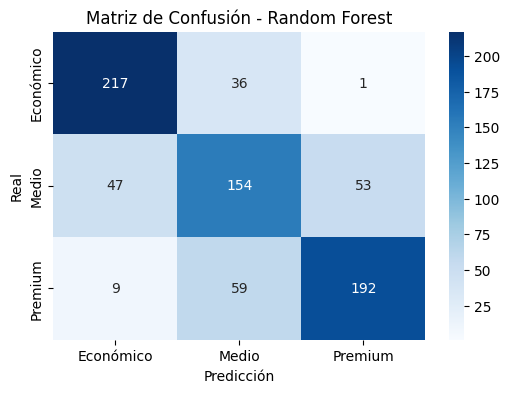

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=['Económico','Medio','Premium'],
    yticklabels=['Económico','Medio','Premium']
)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

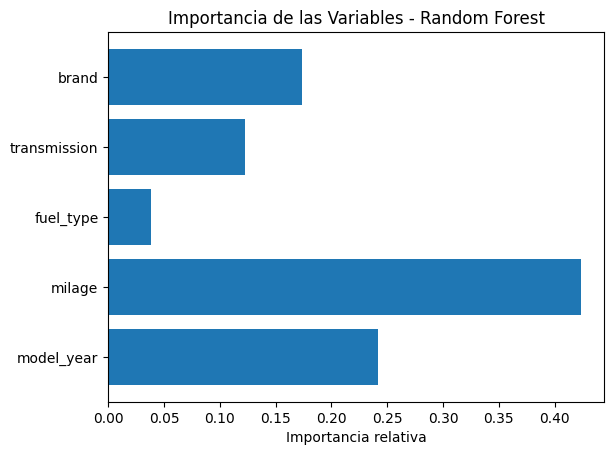

In [ ]:
importances = rf.feature_importances_
plt.barh(features, importances)
plt.title("Importancia de las Variables - Random Forest")
plt.xlabel("Importancia relativa")
plt.show()

In [ ]:
!pip install kagglehub pandas matplotlib seaborn scikit-learn --quiet

import kagglehub
path = kagglehub.dataset_download("taeefnajib/used-car-price-prediction-dataset")

import pandas as pd
df = pd.read_csv(f"{path}/used_cars.csv")

df.columns = ['brand','model','model_year','milage','fuel_type','engine','transmission','ext_col','int_col','accident','clean_title','price']
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
df['milage'] = df['milage'].replace(r'[,.a-zA-Z\s]', '', regex=True).astype(float)
df = df.dropna(subset=['brand','model_year','milage','fuel_type','price'])

Using Colab cache for faster access to the 'used-car-price-prediction-dataset' dataset.


In [ ]:
import numpy as np
p33, p66 = np.percentile(df["price"], [33, 66])

def label_price(v):
    if v <= p33: return "Económico"
    elif v <= p66: return "Medio"
    else: return "Premium"

df["price_range"] = df["price"].apply(label_price)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
for col in ['brand','fuel_type','transmission']:
    df[col] = le.fit_transform(df[col])

X = df[['model_year','milage','brand','fuel_type','transmission']]
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.72265625
              precision    recall  f1-score   support

   Económico       0.79      0.85      0.82       254
       Medio       0.61      0.59      0.60       254
     Premium       0.76      0.73      0.74       260

    accuracy                           0.72       768
   macro avg       0.72      0.72      0.72       768
weighted avg       0.72      0.72      0.72       768



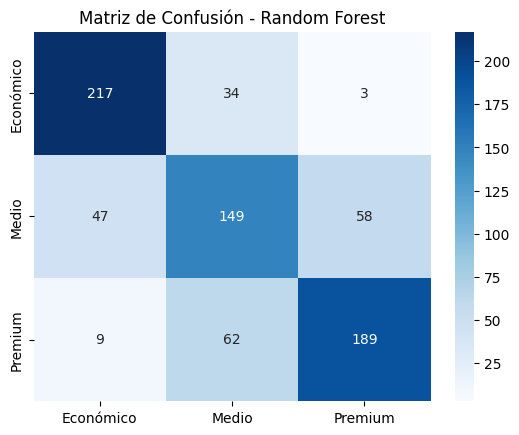

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Económico","Medio","Premium"],
            yticklabels=["Económico","Medio","Premium"])
plt.title("Matriz de Confusión - Random Forest")
plt.show()

In [ ]:
# Guardar un encoder por columna
encoders = {}
for col in ['brand','fuel_type','transmission']:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col])
    encoders[col] = enc


In [ ]:
def predecir_auto(model_year, milage, brand, fuel_type, transmission):
    # Convertir valores categóricos usando los encoders guardados
    brand_enc = encoders['brand'].transform([brand])[0]
    fuel_enc = encoders['fuel_type'].transform([fuel_type])[0]
    trans_enc = encoders['transmission'].transform([transmission])[0]

    # Crear DataFrame con los valores ingresados
    entrada_df = pd.DataFrame([{
        "model_year": model_year,
        "milage": milage,
        "brand": brand_enc,
        "fuel_type": fuel_enc,
        "transmission": trans_enc
    }])

    # Realizar predicción
    pred = rf.predict(entrada_df)[0]
    return pred

In [ ]:
encoders = {}
for col in ['brand','fuel_type','transmission']:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col].astype(str))
    encoders[col] = enc

In [ ]:
def predecir_auto(model_year, milage, brand, fuel_type, transmission):
    # Validar si las categorías existen en el encoder
    for col, value in zip(['brand','fuel_type','transmission'],
                          [brand, fuel_type, transmission]):
        if value not in encoders[col].classes_:
            return f"⚠ Error: '{value}' no existe en el dataset para '{col}'. Valores válidos: {list(encoders[col].classes_)[:10]} ..."

    # Codificar
    brand_enc = encoders['brand'].transform([brand])[0]
    fuel_enc = encoders['fuel_type'].transform([fuel_type])[0]
    trans_enc = encoders['transmission'].transform([transmission])[0]

    entrada = pd.DataFrame([{
        'model_year': model_year,
        'milage': milage,
        'brand': brand_enc,
        'fuel_type': fuel_enc,
        'transmission': trans_enc
    }])

    pred = rf.predict(entrada)[0]
    return f"✅ Clasificación: {pred}"

In [ ]:
predecir_auto(
    model_year=2018,
    milage=60000,
    brand="0",
    fuel_type="1",
    transmission="10"
)

'✅ Clasificación: Premium'

In [ ]:
sorted(encoders['brand'].classes_)[:30]

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35']

In [ ]:
df = pd.read_csv(f"{path}/used_cars.csv")

df.columns = ['brand','model','model_year','milage','fuel_type','engine','transmission','ext_col','int_col','accident','clean_title','price']
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
df['milage'] = df['milage'].replace(r'[,.a-zA-Z\s]', '', regex=True).astype(float)

df = df.dropna(subset=['brand','model_year','milage','fuel_type','price'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in ['brand','fuel_type','transmission']:
    enc = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = enc.fit_transform(df[col])
    encoders[col] = enc

In [ ]:
print(sorted(encoders['brand'].classes_)[:30])
print(encoders['fuel_type'].classes_)
print(encoders['transmission'].classes_)

['Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT', 'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hummer', 'Hyundai', 'INFINITI', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'MINI']
['Diesel' 'E85 Flex Fuel' 'Gasoline' 'Hybrid' 'Plug-In Hybrid'
 'not supported' '–']
['1-Speed Automatic' '10-Speed A/T' '10-Speed Automatic'
 '10-Speed Automatic with Overdrive' '2' '4-Speed A/T' '4-Speed Automatic'
 '5-Speed A/T' '5-Speed Automatic' '5-Speed M/T' '6 Speed At/Mt'
 '6 Speed Mt' '6-Speed' '6-Speed A/T' '6-Speed Automatic'
 '6-Speed Automatic with Auto-Shift'
 '6-Speed Electronically Controlled Automatic with O' '6-Speed M/T'
 '6-Speed Manual' '7-Speed' '7-Speed A/T' '7-Speed Automatic'
 '7-Speed Automatic with Auto-Shift' '7-Speed DCT Automatic' '7-Speed M/T'
 '7-Speed Manual' '8-SPEED A/T' '8-SPEED AT' '8-Speed A/T'
 '8-Speed Automatic' '8-Speed Automatic with Auto-Shift' '8-Speed Ma

In [ ]:
def predecir_auto(model_year, milage, brand, fuel_type, transmission):
    for col, value in zip(['brand','fuel_type','transmission'],
                          [brand, fuel_type, transmission]):
        if value not in encoders[col].classes_:
            return f"⚠ '{value}' no existe en '{col}'. Valores válidos: {list(encoders[col].classes_)[:10]} ..."

    brand_enc = encoders['brand'].transform([brand])[0]
    fuel_enc = encoders['fuel_type'].transform([fuel_type])[0]
    trans_enc = encoders['transmission'].transform([transmission])[0]

    df_input = pd.DataFrame([{
        "model_year": model_year,
        "milage": milage,
        "brand": brand_enc,
        "fuel_type": fuel_enc,
        "transmission": trans_enc
    }])

    pred = rf.predict(df_input)[0]
    return f"✅ Clasificación: {pred}"

In [ ]:
predecir_auto(
    model_year=2018,
    milage=60000,
    brand="Toyota",
    fuel_type="Gasoline",
    transmission="Automatic"
)

'✅ Clasificación: Medio'

In [ ]:
predecir_auto(
    model_year=2008,
    milage=190000,
    brand="Chevrolet",
    fuel_type="Gasoline",
    transmission="Manual"
)

'✅ Clasificación: Económico'

In [ ]:
predecir_auto(
    model_year=2022,
    milage=12000,
    brand="BMW",
    fuel_type="Gasoline",
    transmission="Automatic"
)

'✅ Clasificación: Premium'